In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
full_df = pd.read_csv('/content/train.csv')

#Initial EDA

In [3]:
full_df.shape

(404290, 6)

In [4]:
full_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
full_df.duplicated().sum()

0

In [6]:
full_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [7]:

print(full_df['is_duplicate'].value_counts())
print((full_df['is_duplicate'].value_counts()/full_df['is_duplicate'].count())*100)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate', ylabel='count'>

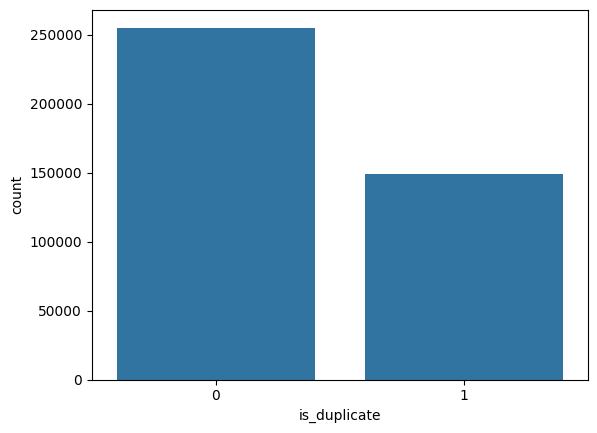

In [8]:
sns.barplot(full_df['is_duplicate'].value_counts())

In [9]:
#Repeated questions
qid  = pd.Series(list(full_df['qid1']) + list(full_df['qid2']))
print("No.of questions that are Unique",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("No.of questions that are repeated",x[x].shape[0])

No.of questions that are Unique 537933
No.of questions that are repeated 111780


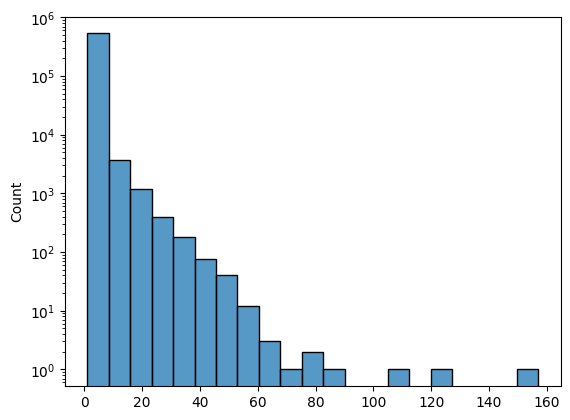

In [40]:
sns.histplot(qid.value_counts().values)
plt.yscale('log')
plt.show()

In [10]:
df  = full_df.sample(30000)

In [11]:
df.shape

(30000, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 367115 to 92066
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [15]:
df = df.drop(columns=['id','qid1','qid2'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv =  CountVectorizer(max_features=3000)


In [17]:
questions = list(df['question1'])+list(df['question2'])
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [18]:
temp_1 =  pd.DataFrame(q1_arr,index = df.index )
temp_2 = pd.DataFrame(q2_arr, index = df.index)
temp_df = pd.concat([temp_1,temp_2],axis = 1)

In [19]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
367115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347173,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
temp_df.shape

(30000, 6000)

In [21]:
temp_df['is_duplicate'] = df['is_duplicate']

In [22]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
367115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347173,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
33888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp_df.shape

(30000, 6001)

In [24]:
x = temp_df.iloc[:,:-1]
y = temp_df.iloc[:,-1]

In [25]:
x

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
367115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347173,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y

,is_duplicate
367115,0
347173,1
33888,0
330592,0
289808,0
...,...
62393,0
296289,1
101575,0
120910,1


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.2, random_state =101)

In [28]:
x_train.shape

(24000, 6000)

In [29]:
x_test.shape

(6000, 6000)

In [30]:
y_train.shape

(24000,)

In [31]:
y_test.shape

(6000,)

In [32]:
from sklearn.metrics import accuracy_score,precision_score

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(accuracy_score(y_pred, y_test))
print(precision_score(y_pred,y_test))


0.74
0.4558180227471566


In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train.to_numpy(),y_train)
y_pred = xgb.predict(x_test.to_numpy())

print(accuracy_score(y_pred, y_test))
print(precision_score(y_pred,y_test))

0.721
0.4378827646544182
